In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'Malgun Gothic'

In [28]:
data.isnull().sum()

ID          0
출동일시        0
이름          0
성별          0
나이          0
체온          0
수축기 혈압      0
이완기 혈압      0
호흡 곤란       0
간헐성 경련      0
설사          0
기침          0
출혈          0
통증          0
만지면 아프다     0
무감각         0
마비          0
현기증         0
졸도          0
말이 어눌해졌다    0
시력이 흐려짐     0
중증질환        0
이송 시간       0
dtype: int64

In [7]:
# 응급 출동 데이터 불러오기
# 파일명 : 119_emergency_dispatch.csv
# 중증 질환이 ['심근경색', '복부손상', '뇌경색', '뇌출혈']인 데이터만 추출
# 데이터 랜덤으로 섞기

data = pd.read_csv('119_emergency_dispatch_1.csv', encoding="cp949" )
desease = data[data['중증질환'].isin(['심근경색', '복부손상', '뇌경색', '뇌출혈'])]

# 데이터 랜덤으로 섞기

desease = desease.sample(frac=1).reset_index(drop=True)


In [9]:
desease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        17024 non-null  object 
 1   출동일시      17024 non-null  object 
 2   이름        17024 non-null  object 
 3   성별        17024 non-null  object 
 4   나이        17024 non-null  int64  
 5   체온        17024 non-null  float64
 6   수축기 혈압    17024 non-null  int64  
 7   이완기 혈압    17024 non-null  int64  
 8   호흡 곤란     17024 non-null  int64  
 9   간헐성 경련    17024 non-null  int64  
 10  설사        17024 non-null  int64  
 11  기침        17024 non-null  int64  
 12  출혈        17024 non-null  int64  
 13  통증        17024 non-null  int64  
 14  만지면 아프다   17024 non-null  int64  
 15  무감각       17024 non-null  int64  
 16  마비        17024 non-null  int64  
 17  현기증       17024 non-null  int64  
 18  졸도        17024 non-null  int64  
 19  말이 어눌해졌다  17024 non-null  int64  
 20  시력이 흐려짐   17024 non-null  in

## 1) 학습용, 평가용 데이터 준비하기

 * 함수로 전처리 과정을 정의
   * Target : 중증질환
   * 전처리 대상 : 발열, 고혈압, 저혈압
   * Feature : '체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다', 
           '무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압'
   * Feature와 Target을 분리하여 결과값 return
 

In [67]:
def preprocessing(desease):
    
    target = '중증질환'

    desease['발열'] = [ 1 if x >=37 else 0 for x in desease['체온']]
    desease['고혈압'] = [1 if x >= 140 else 0 for x in desease['수축기 혈압']]
    desease['저혈압'] = [1 if x <= 90 else 0 for x in desease['수축기 혈압']]
    
    x = desease[['체온', '수축기 혈압', '이완기 혈압', '호흡 곤란', '간헐성 경련', '설사', '기침', '출혈', '통증', '만지면 아프다','무감각', '마비', '현기증', '졸도', '말이 어눌해졌다', '시력이 흐려짐', '발열', '고혈압', '저혈압']]
    y = desease['중증질환']

    desease['중증질환'] = desease['중증질환'].map({'심근경색':0, '복부손상':1, '뇌경색':2, '뇌출혈':3})
    
#     x = desease.drop(target, axis = 1)
#     y = desease.loc[:, target]
    
    return x, y

In [37]:
# x, y 데이터 나누기
# preprocessing 함수 활용하여 전처리까지 완료하고 데이터 분리

x, y = preprocessing(desease)

In [68]:
y.head()

0    1
1    0
2    2
3    2
4    2
Name: 중증질환, dtype: int64

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   체온        17024 non-null  float64
 1   수축기 혈압    17024 non-null  int64  
 2   이완기 혈압    17024 non-null  int64  
 3   호흡 곤란     17024 non-null  int64  
 4   간헐성 경련    17024 non-null  int64  
 5   설사        17024 non-null  int64  
 6   기침        17024 non-null  int64  
 7   출혈        17024 non-null  int64  
 8   통증        17024 non-null  int64  
 9   만지면 아프다   17024 non-null  int64  
 10  무감각       17024 non-null  int64  
 11  마비        17024 non-null  int64  
 12  현기증       17024 non-null  int64  
 13  졸도        17024 non-null  int64  
 14  말이 어눌해졌다  17024 non-null  int64  
 15  시력이 흐려짐   17024 non-null  int64  
 16  발열        17024 non-null  int64  
 17  고혈압       17024 non-null  int64  
 18  저혈압       17024 non-null  int64  
dtypes: float64(1), int64(18)
memory usage: 2.5 MB


In [41]:
# 데이터 분할 비율: 학습데이터 7 : 검증데이터 3

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 29)

## 2) 모델링

 * 활용 모델 : DecisionTreeClassifier, RandomForestClassifier, XGBClassifier, DNN
 * 성능 평가 : accuracy_score

## 2-1 Decision Tree 성능평가

In [55]:
## Decision Tree
## 1) 불러오기
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 2) 선언하기
model = DecisionTreeClassifier( random_state= 29)

## 3) 검증
cv_score = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')

## 4) 확인
print(cv_score)
print('평균:', cv_score.mean())

## 5) 성능정보 수집

result = {}

result['Decistion Tree'] = cv_score.mean()

print(result)

[0.88506711 0.88082249 0.88543852 0.88040285 0.8862778 ]
평균: 0.8836017568515239
{'Decistion Tree': 0.8836017568515239}


## 2-1 Decision Tree 실제 성능

In [49]:
## Decision Tree
## 1) 불러오기

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 2) 선언하기
model = DecisionTreeClassifier( random_state= 29)

## 3) 학습하기
model.fit(x_train,y_train)

## 4) 예측하기
y_pred = model.predict(x_val)

## 5) 평가하기
print(accuracy_score(y_val,y_pred))

0.8860610806577917


## 2-2 RandomForest 성능 평가

In [56]:
## RandomForest

## 1) 불러오기

from sklearn.ensemble import RandomForestClassifier

## 2) 선언하기
model = RandomForestClassifier(random_state= 29)

## 3) 검증
cv_score = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')

## 4) 확인
print(cv_score)
print('평균:', cv_score.mean())

## 5) 성능정보 수집


result['RandomForestClassifier'] = cv_score.mean()

print(result)

[0.91149329 0.90977759 0.90809903 0.91145615 0.91061687]
평균: 0.9102885863794722
{'Decistion Tree': 0.8836017568515239, 'RandomForestClassifier': 0.9102885863794722}


In [ ]:
## 2-3 RandomForest 평가

In [57]:
# 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

## 1) 선언하기
model = RandomForestClassifier(random_state= 29)

## 2) 선언하기
model = RandomForestClassifier( random_state= 29)

## 3) 학습하기
model.fit(x_train,y_train)

## 4) 예측하기
y_pred = model.predict(x_val)

## 5) 평가하기
print(accuracy_score(y_val,y_pred))

0.9111198120595145


## 2-3 XGBoost 성능예측

In [58]:
## XGBoost
## 1) 불러오기

from xgboost.sklearn import XGBClassifier

## 2) 선언하기

model = XGBClassifier(max_depth = 5, random_state= 29)

## 3) 검증

cv_score = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')

## 4) 확인
print(cv_score)
print('평균:', cv_score.mean())

## 5) 성능정보 수집

result['XGBoost'] = cv_score.mean()

print(result)

[0.91946309 0.91984893 0.91607218 0.92194713 0.92026857]
평균: 0.9195199779196601
{'Decistion Tree': 0.8836017568515239, 'RandomForestClassifier': 0.9102885863794722, 'XGBoost': 0.9195199779196601}


## 2-3 XGBoost 성능평가

In [59]:
XGB_model = XGBClassifier( random_state=29)

# 학습하기
XGB_model.fit(x_train, y_train)

# 예측하기
XGB_pred = XGB_model.predict(x_val)

# 모델 평가 출력(accuracy_score, confusion_matrix, classification_report)

print(accuracy_score(y_val,y_pred))

0.9111198120595145


## 2-4 DNN 성능예측

In [70]:
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [71]:
x_train

array([[0.15384615, 0.60674157, 0.48484848, ..., 0.        , 0.        ,
        0.        ],
       [0.23076923, 0.53932584, 0.37373737, ..., 0.        , 0.        ,
        0.        ],
       [0.1025641 , 0.34831461, 0.49494949, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05128205, 0.4494382 , 0.4040404 , ..., 0.        , 0.        ,
        0.        ],
       [0.15384615, 0.49438202, 0.54545455, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.42696629, 0.37373737, ..., 0.        , 0.        ,
        0.        ]])

In [72]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

19

In [74]:
## DNN
## 1) 불러오기



# 메모리 정리
clear_session()

## 2) 선언하기

model = Sequential( Dense( 4 , input_shape = (nfeatures,), activation = 'softmax' ) )


# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 80        
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='sparse_categorical_crossentropy'  )

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
298/298 [==============================] - 2s 5ms/step - loss: 0.3793 - val_loss: 0.3640
Epoch 2/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3397 - val_loss: 0.3513
Epoch 3/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3404 - val_loss: 0.3752
Epoch 4/50
298/298 [==============================] - 1s 4ms/step - loss: 0.3397 - val_loss: 0.3633
Epoch 5/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3380 - val_loss: 0.3612
Epoch 6/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3398 - val_loss: 0.3598
Epoch 7/50
298/298 [==============================] - 1s 4ms/step - loss: 0.3397 - val_loss: 0.3561
Epoch 8/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3452 - val_loss: 0.3482
Epoch 9/50
298/298 [==============================] - 1s 3ms/step - loss: 0.3416 - val_loss: 0.3593
Epoch 10/50
298/298 [==============================] - 1s 4ms/step - loss: 0.3386 - val_loss: 0.3660

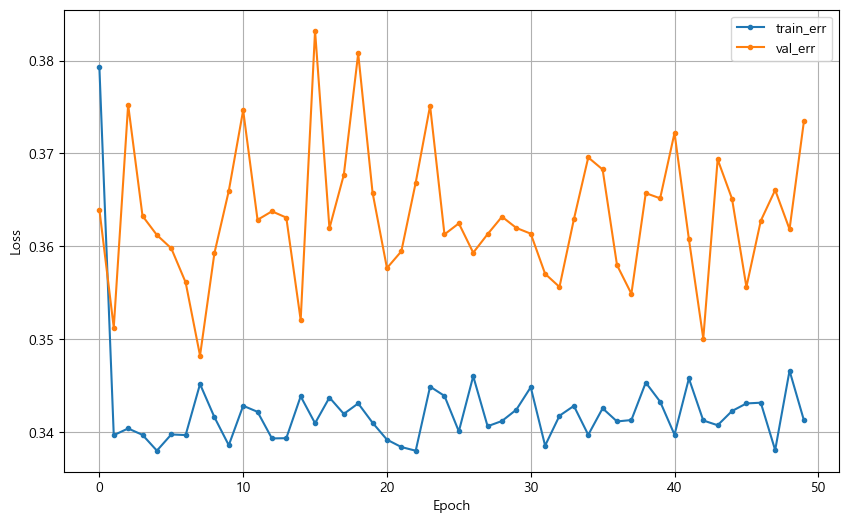

In [76]:
dl_history_plot(history)

# DNN 모델 2

In [77]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense( 8, input_shape = (nfeatures,), activation = 'relu'),
                    Dense( 4, activation = 'softmax' )
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 160       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(optimizer=Adam(learning_rate=0.01), 
              loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
298/298 [==============================] - 2s 5ms/step - loss: 0.4834 - val_loss: 0.3164
Epoch 2/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2897 - val_loss: 0.2831
Epoch 3/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2723 - val_loss: 0.2867
Epoch 4/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2610 - val_loss: 0.2833
Epoch 5/100
298/298 [==============================] - 1s 4ms/step - loss: 0.2566 - val_loss: 0.2630
Epoch 6/100
298/298 [==============================] - 1s 4ms/step - loss: 0.2504 - val_loss: 0.2599
Epoch 7/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2469 - val_loss: 0.2537
Epoch 8/100
298/298 [==============================] - 1s 4ms/step - loss: 0.2421 - val_loss: 0.2590
Epoch 9/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2401 - val_loss: 0.2476
Epoch 10/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2387 - val_lo

298/298 [==============================] - 1s 4ms/step - loss: 0.2022 - val_loss: 0.2249
Epoch 82/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2029 - val_loss: 0.2250
Epoch 83/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2014 - val_loss: 0.2246
Epoch 84/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2031 - val_loss: 0.2219
Epoch 85/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2016 - val_loss: 0.2224
Epoch 86/100
298/298 [==============================] - 1s 4ms/step - loss: 0.2011 - val_loss: 0.2297
Epoch 87/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2032 - val_loss: 0.2262
Epoch 88/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2009 - val_loss: 0.2215
Epoch 89/100
298/298 [==============================] - 1s 4ms/step - loss: 0.2028 - val_loss: 0.2241
Epoch 90/100
298/298 [==============================] - 1s 3ms/step - loss: 0.2019 - val_loss: 

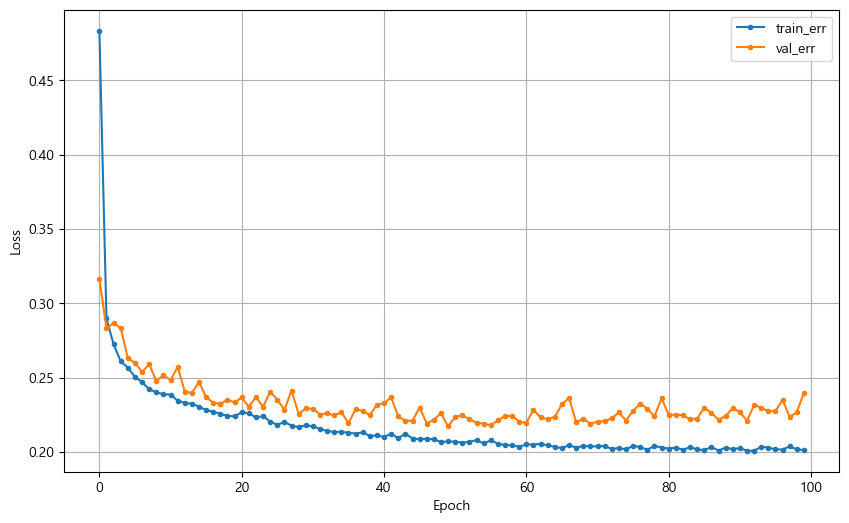

160/160 [==============================] - 1s 3ms/step


In [79]:
dl_history_plot(history)
pred = model.predict(x_val)
pred_2 = pred.argmax(axis=1)

In [80]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

160/160 [==============================] - 0s 2ms/step


In [85]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))
print(accuracy_score(y_val, pred_1))

[[1206   11    4    5]
 [   9 1298   73   27]
 [  12  129 1038   42]
 [   8   15   76 1155]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1226
           1       0.89      0.92      0.91      1407
           2       0.87      0.85      0.86      1221
           3       0.94      0.92      0.93      1254

    accuracy                           0.92      5108
   macro avg       0.92      0.92      0.92      5108
weighted avg       0.92      0.92      0.92      5108

0.9195379796397808


# DNN 모델 3

Epoch 1/50


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


261/261 [==============================] - 2s 5ms/step - loss: 0.9026 - val_loss: 0.4646
Epoch 2/50
261/261 [==============================] - 1s 5ms/step - loss: 0.3727 - val_loss: 0.3106
Epoch 3/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2869 - val_loss: 0.2684
Epoch 4/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2585 - val_loss: 0.2507
Epoch 5/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2440 - val_loss: 0.2421
Epoch 6/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2342 - val_loss: 0.2360
Epoch 7/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2292 - val_loss: 0.2302
Epoch 8/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2240 - val_loss: 0.2261
Epoch 9/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2195 - val_loss: 0.2213
Epoch 10/50
261/261 [==============================] - 1s 4ms/step - loss: 0.2182 - val_loss: 0.2212
Epoch 11/5

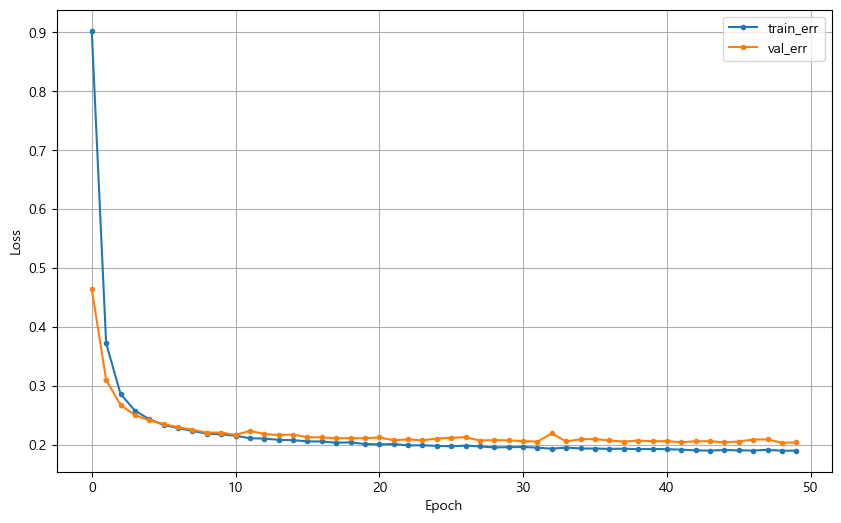

In [82]:
model3 = Sequential([Dense(16, input_shape = (nfeatures,), activation = 'relu'),
                     Dense(12, activation = 'relu'),                     
                     Dense(8, activation = 'relu'),
                     Dense(4, activation = 'softmax')])

model3.compile(optimizer = Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy')

history = model3.fit(x_train, y_train, epochs=50, validation_split=0.3).history

pred_3 = model3.predict(x_val)
pred_3 = pred.argmax(axis=1)

dl_history_plot(history)

In [88]:
pred_3 = model3.predict(x_val)
pred_3 = pred_3.argmax(axis=1)

160/160 [==============================] - 0s 2ms/step


In [89]:
print(confusion_matrix(y_val, pred_3))
print(classification_report(y_val, pred_3))
print(accuracy_score(y_val, pred_3))

[[1205   12    6    3]
 [  12 1292   89   14]
 [  11  114 1057   39]
 [   8   14   78 1154]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1226
           1       0.90      0.92      0.91      1407
           2       0.86      0.87      0.86      1221
           3       0.95      0.92      0.94      1254

    accuracy                           0.92      5108
   macro avg       0.92      0.92      0.92      5108
weighted avg       0.92      0.92      0.92      5108

0.9216914643696162


# 모델 4 dense =4

In [98]:
model5 = Sequential([Dense(16, input_shape = (nfeatures,), activation = 'relu', ),
                     Dense(4, activation = 'relu'),                     
                     Dense(4, activation = 'softmax')])

model5.compile(optimizer = Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy')

history = model5.fit(x_train, y_train, epochs=50, validation_split=0.3,).history

pred_5 = model5.predict(x_val)
pred_5 = pred.argmax(axis=1)

dl_history_plot(history)

SyntaxError: keyword argument repeated: epochs (4235116067.py, line 7)

In [100]:
best_model = grid_result.best_estimator_
y_pred = best_model.predict(x_val)

# 정확도 출력
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', accuracy)

160/160 [==============================] - 0s 2ms/step
Accuracy: 0.9207126076742365


In [ ]:
{'layer1': 16, 'layer2': 4, 'lr': 0.001}

In [ ]:
pred_6 = model.predict(x_val)
pred_6 = pred.argmax(axis=1)

In [ ]:
print(accuracy_score(y_val, pred_3))

In [93]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# 모델 생성 함수
def create_model(lr=0.001, layer1=16, layer2=8):
    model = Sequential()
    model.add(Dense(layer1, input_shape=(nfeatures,), activation='relu'))
    model.add(Dense(layer2, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(lr=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
    return model

# 가능한 하이퍼파라미터 값 범위 설정
param_grid = {'lr': [0.001, 0.01],
              'layer1': [16, 32, 64],
              'layer2': [4, 8, 16]}

# KerasClassifier를 이용한 GridSearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# 결과 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\User\AppData\Local\Temp\ipykernel_4112\3227164930.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 1.1062
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.5829
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3851
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3264
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2967
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2768
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2629
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2543
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2470
Epoch 10/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2406
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2360
Epoch 12/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2321
Epoch 13/50
249/249 [====

125/125 [==============================] - 1s 4ms/step - loss: 0.2180
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 1.1723
Epoch 2/50
249/249 [==============================] - 1s 4ms/step - loss: 0.7157
Epoch 3/50
249/249 [==============================] - 1s 5ms/step - loss: 0.5236
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.4260
Epoch 5/50
249/249 [==============================] - 1s 4ms/step - loss: 0.3672
Epoch 6/50
249/249 [==============================] - 1s 4ms/step - loss: 0.3296
Epoch 7/50
249/249 [==============================] - 1s 5ms/step - loss: 0.3044
Epoch 8/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2871
Epoch 9/50
249/249 [==============================] - 1s 5ms/step - loss: 0.2738
Epoch 10/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2638
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2552
Epoch 12/50
249/249 [================

249/249 [==============================] - 1s 3ms/step - loss: 0.1930
Epoch 49/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1925
Epoch 50/50
125/125 [==============================] - 1s 3ms/step - loss: 0.2100
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 0.4229
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2644
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2442
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2338
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2300
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2257
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2220
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2191
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2165
Epoch 10/50
249/249 [================

249/249 [==============================] - 1s 3ms/step - loss: 0.1955
Epoch 47/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1943
Epoch 48/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1961
Epoch 49/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1942
Epoch 50/50
125/125 [==============================] - 1s 3ms/step - loss: 0.2091
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 1.1120
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.5702
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.4061
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3402
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3067
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2853
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2695
Epoch 8/50
249/249 [===============

249/249 [==============================] - 1s 3ms/step - loss: 0.1924
Epoch 45/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1919
Epoch 46/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1913
Epoch 47/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1912
Epoch 48/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1906
Epoch 49/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1901
Epoch 50/50
125/125 [==============================] - 1s 3ms/step - loss: 0.2115
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 1.1866
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.6047
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.3659
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2917
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2641
Epoch 6/50
249/249 [=============

249/249 [==============================] - 1s 3ms/step - loss: 0.1907
Epoch 43/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1888
Epoch 44/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1887
Epoch 45/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1907
Epoch 46/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1920
Epoch 47/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1883
Epoch 48/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1926
Epoch 49/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1872
Epoch 50/50
125/125 [==============================] - 1s 3ms/step - loss: 0.2127
Epoch 1/50
249/249 [==============================] - 1s 3ms/step - loss: 0.4707
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2610
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2377
Epoch 4/50
249/249 [===========

249/249 [==============================] - 1s 3ms/step - loss: 0.1934
Epoch 41/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1909
Epoch 42/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1955
Epoch 43/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1914
Epoch 44/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1946
Epoch 45/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1966
Epoch 46/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1907
Epoch 47/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1930
Epoch 48/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1911
Epoch 49/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1912
Epoch 50/50
125/125 [==============================] - 1s 2ms/step - loss: 0.2093
Epoch 1/50
249/249 [==============================] - 2s 3ms/step - loss: 0.8870
Epoch 2/50
249/249 [=========

249/249 [==============================] - 1s 4ms/step - loss: 0.1903
Epoch 39/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1908
Epoch 40/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1891
Epoch 41/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1900
Epoch 42/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1892
Epoch 43/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1891
Epoch 44/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1881
Epoch 45/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1886
Epoch 46/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1881
Epoch 47/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1882
Epoch 48/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1872
Epoch 49/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1866
Epoch 50/50
125/125 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1913
Epoch 37/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1899
Epoch 38/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1871
Epoch 39/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1881
Epoch 40/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1874
Epoch 41/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1923
Epoch 42/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1892
Epoch 43/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1872
Epoch 44/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1876
Epoch 45/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1882
Epoch 46/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1869
Epoch 47/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1857
Epoch 48/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1911
Epoch 35/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1899
Epoch 36/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1904
Epoch 37/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1909
Epoch 38/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1907
Epoch 39/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1932
Epoch 40/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1878
Epoch 41/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1904
Epoch 42/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1901
Epoch 43/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1901
Epoch 44/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1885
Epoch 45/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1910
Epoch 46/50
249/249 [=======

249/249 [==============================] - 1s 4ms/step - loss: 0.1981
Epoch 33/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1978
Epoch 34/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1974
Epoch 35/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1965
Epoch 36/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1971
Epoch 37/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1954
Epoch 38/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1953
Epoch 39/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1956
Epoch 40/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1948
Epoch 41/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1947
Epoch 42/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1944
Epoch 43/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1939
Epoch 44/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1917
Epoch 31/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1924
Epoch 32/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1919
Epoch 33/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1904
Epoch 34/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1912
Epoch 35/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1901
Epoch 36/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1934
Epoch 37/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1898
Epoch 38/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1865
Epoch 39/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1897
Epoch 40/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1898
Epoch 41/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1904
Epoch 42/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1962
Epoch 29/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1932
Epoch 30/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1927
Epoch 31/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1977
Epoch 32/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1948
Epoch 33/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1950
Epoch 34/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1975
Epoch 35/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1931
Epoch 36/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1940
Epoch 37/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1924
Epoch 38/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1928
Epoch 39/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1915
Epoch 40/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1964
Epoch 27/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1968
Epoch 28/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1956
Epoch 29/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1953
Epoch 30/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1941
Epoch 31/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1937
Epoch 32/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1932
Epoch 33/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1916
Epoch 34/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1914
Epoch 35/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1919
Epoch 36/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1903
Epoch 37/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1902
Epoch 38/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1938
Epoch 25/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1947
Epoch 26/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1884
Epoch 27/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1901
Epoch 28/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1903
Epoch 29/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1910
Epoch 30/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1894
Epoch 31/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1898
Epoch 32/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1894
Epoch 33/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1896
Epoch 34/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1880
Epoch 35/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1878
Epoch 36/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1915
Epoch 23/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1952
Epoch 24/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1934
Epoch 25/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1926
Epoch 26/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1944
Epoch 27/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1908
Epoch 28/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1901
Epoch 29/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1910
Epoch 30/50
249/249 [==============================] - 1s 6ms/step - loss: 0.1905
Epoch 31/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1895
Epoch 32/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1911
Epoch 33/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1905
Epoch 34/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1919
Epoch 21/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1905
Epoch 22/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1896
Epoch 23/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1888
Epoch 24/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1883
Epoch 25/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1885
Epoch 26/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1882
Epoch 27/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1874
Epoch 28/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1864
Epoch 29/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1869
Epoch 30/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1854
Epoch 31/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1859
Epoch 32/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1939
Epoch 19/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1938
Epoch 20/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1941
Epoch 21/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1913
Epoch 22/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1941
Epoch 23/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1910
Epoch 24/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1937
Epoch 25/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1918
Epoch 26/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1925
Epoch 27/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1919
Epoch 28/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1884
Epoch 29/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1903
Epoch 30/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1939
Epoch 17/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1968
Epoch 18/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1936
Epoch 19/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1925
Epoch 20/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1951
Epoch 21/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1904
Epoch 22/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1950
Epoch 23/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1964
Epoch 24/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1934
Epoch 25/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1895
Epoch 26/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1895
Epoch 27/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1899
Epoch 28/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.2007
Epoch 15/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1985
Epoch 16/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1968
Epoch 17/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1952
Epoch 18/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1935
Epoch 19/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1929
Epoch 20/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1923
Epoch 21/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1914
Epoch 22/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1905
Epoch 23/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1892
Epoch 24/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1882
Epoch 25/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1880
Epoch 26/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.1988
Epoch 13/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1997
Epoch 14/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1954
Epoch 15/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1947
Epoch 16/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1952
Epoch 17/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1959
Epoch 18/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1943
Epoch 19/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1945
Epoch 20/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1881
Epoch 21/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1923
Epoch 22/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1952
Epoch 23/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1941
Epoch 24/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.2254
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2286
Epoch 12/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2228
Epoch 13/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2256
Epoch 14/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2249
Epoch 15/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2233
Epoch 16/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2217
Epoch 17/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2187
Epoch 18/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2203
Epoch 19/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2178
Epoch 20/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2148
Epoch 21/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2174
Epoch 22/50
249/249 [=======

249/249 [==============================] - 1s 3ms/step - loss: 0.2120
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2091
Epoch 10/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2051
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2027
Epoch 12/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1992
Epoch 13/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1987
Epoch 14/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1956
Epoch 15/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1952
Epoch 16/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1957
Epoch 17/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1934
Epoch 18/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1911
Epoch 19/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1903
Epoch 20/50
249/249 [========

249/249 [==============================] - 1s 3ms/step - loss: 0.2089
Epoch 7/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2067
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2027
Epoch 9/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2033
Epoch 10/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1977
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2016
Epoch 12/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1938
Epoch 13/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1968
Epoch 14/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1932
Epoch 15/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1935
Epoch 16/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1939
Epoch 17/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1920
Epoch 18/50
249/249 [==========

249/249 [==============================] - 1s 3ms/step - loss: 0.2160
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2123
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2089
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2089
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2031
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2058
Epoch 10/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1998
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2024
Epoch 12/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1989
Epoch 13/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1982
Epoch 14/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1976
Epoch 15/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1970
Epoch 16/50
249/249 [============

249/249 [==============================] - 1s 3ms/step - loss: 0.2950
Epoch 3/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2531
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2323
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2213
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2133
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2087
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2054
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2007
Epoch 10/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2001
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1964
Epoch 12/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1957
Epoch 13/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1937
Epoch 14/50
249/249 [==============

125/125 [==============================] - 1s 3ms/step - loss: 0.1979
Epoch 1/50
249/249 [==============================] - 2s 5ms/step - loss: 0.3277
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2381
Epoch 3/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2160
Epoch 4/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2111
Epoch 5/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2068
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2045
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2015
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1993
Epoch 9/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2015
Epoch 10/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1940
Epoch 11/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1943
Epoch 12/50
249/249 [================

249/249 [==============================] - 1s 3ms/step - loss: 0.1806
Epoch 50/50
125/125 [==============================] - 1s 3ms/step - loss: 0.2313
Epoch 1/50
249/249 [==============================] - 2s 3ms/step - loss: 0.3474
Epoch 2/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2333
Epoch 3/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2214
Epoch 4/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2151
Epoch 5/50
249/249 [==============================] - 1s 4ms/step - loss: 0.2124
Epoch 6/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2072
Epoch 7/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2078
Epoch 8/50
249/249 [==============================] - 1s 3ms/step - loss: 0.2030
Epoch 9/50
249/249 [==============================] - 1s 4ms/step - loss: 0.1990
Epoch 10/50
249/249 [==============================] - 1s 3ms/step - loss: 0.1994
Epoch 11/50
249/249 [================

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Epoch 1/50
373/373 [==============================] - 2s 3ms/step - loss: 0.9988
Epoch 2/50
373/373 [==============================] - 1s 4ms/step - loss: 0.4333
Epoch 3/50
373/373 [==============================] - 1s 3ms/step - loss: 0.3186
Epoch 4/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2816
Epoch 5/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2615
Epoch 6/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2481
Epoch 7/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2382
Epoch 8/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2307
Epoch 9/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2244
Epoch 10/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2204
Epoch 11/50
373/373 [==============================] - 1s 3ms/step - loss: 0.2161
Epoch 12/50
373/373 [==============================] - 1s 4ms/step - loss: 0.2134
Epoch 13/50
373/373 [====

In [ ]:
{'layer1': 16, 'layer2': 4, 'lr': 0.001}

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# 모델 생성 함수
def create_model(lr=0.001, layer1=16, layer2=12, layer3=8):
    model = Sequential()
    model.add(Dense(layer1, input_shape=(nfeatures,), activation='relu'))
    model.add(Dense(layer2, activation='relu'))
    model.add(Dense(layer3, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(lr=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy')
    return model

# 가능한 하이퍼파라미터 값 범위 설정
param_grid = {'lr': [0.001, 0.01, 0.1],
              'layer1': [16, 32, 64],
              'layer2': [8, 16, 32],
              'layer3': [4, 8, 16]}

# KerasClassifier를 이용한 GridSearch
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# 결과 출력
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
## 2-3 DNN 성능평가

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

## 3) 최적 모델 선정 및 저장

In [ ]:
## 질문) 최적 모델로 선정된 것은 무엇인가?



In [ ]:
## 모델 저장하기





## 4) 새로운 증상으로 중증질환 예측하기

In [ ]:
new_dispatch = {
    "ID" : [500001],
    "출동일시" :['2023-04-18'],
    "이름" : ['최**'],
    "성별" : ["여성"],
    "나이" : [35],
    "체온" : [36.5],
    "수축기 혈압" : [125],
    "이완기 혈압" : [85],
    "호흡 곤란":[0],
    "간헐성 경련":[0],
    "설사":[0],
    "기침":[0],
    "출혈":[1],
    "통증":[0],
    "만지면 아프다":[0],
    "무감각":[1],
    "마비":[1],
    "현기증":[0],
    "졸도":[1],
    "말이 어눌해졌다":[0],
    "시력이 흐려짐":[0],
    "중증질환" : [""],
    "이송 시간" : [0]
}

new_data = pd.DataFrame(new_dispatch)

In [ ]:
# 전처리 과정 진행하기 preprocessing 함수 활용

new_x, new_y = 

In [ ]:
# 모델 불러오기



In [ ]:
# 중증질환 예측하기



# 중증질환 명칭으로 표시하기

sym_list = ['뇌경색', '뇌출혈', '복부손상', '심근경색']



In [ ]:
# 예측 함수 정의하기
# input : 출동 이력 데이터 (new_dispatch, 딕셔너리 형태임)
# output : 중증 질환 명칭
# 함수 안에는 출동 이력 데이터를 전처리하는 과정이 필요함

def predict_disease(new_dispatch):
    
    
    
    
    
    return 
    
    


In [ ]:
# new_dispatch dictionary 형태로 전달됨

predict_disease(new_dispatch)

In [ ]:
Best: nan using {'dropout_rate': 0.3, 'epochs': 30, 'layer1': 16, 'layer2': 4, 'lr': 0.001}


In [106]:
from tensorflow.keras.layers import Dropout
Best: nan using {'layer1': 16, 'layer2': 4, 'lr': 0.001}


Epoch 1/40
835/835 [==============================] - 3s 3ms/step - loss: 0.9392 - val_loss: 0.4793
Epoch 2/40
835/835 [==============================] - 3s 3ms/step - loss: 0.5021 - val_loss: 0.3603
Epoch 3/40
835/835 [==============================] - 3s 3ms/step - loss: 0.4333 - val_loss: 0.3196
Epoch 4/40
835/835 [==============================] - 3s 3ms/step - loss: 0.3965 - val_loss: 0.2952
Epoch 5/40
835/835 [==============================] - 3s 3ms/step - loss: 0.3750 - val_loss: 0.2812
Epoch 6/40
835/835 [==============================] - 3s 3ms/step - loss: 0.3572 - val_loss: 0.2741
Epoch 7/40
835/835 [==============================] - 3s 3ms/step - loss: 0.3510 - val_loss: 0.2681
Epoch 8/40
835/835 [==============================] - 3s 4ms/step - loss: 0.3440 - val_loss: 0.2608
Epoch 9/40
835/835 [==============================] - 3s 4ms/step - loss: 0.3330 - val_loss: 0.2576
Epoch 10/40
835/835 [==============================] - 3s 3ms/step - loss: 0.3267 - val_loss: 0.2562

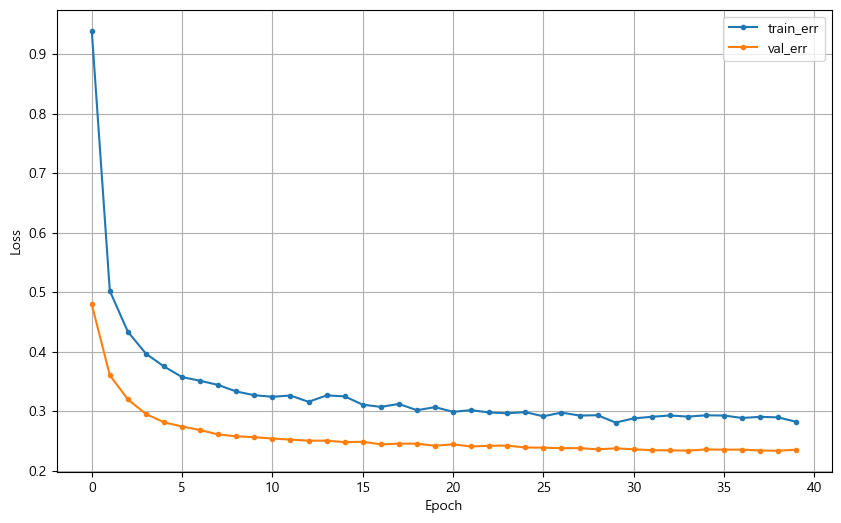

[[1211    7    2    6]
 [  32 1277   75   23]
 [  14  126 1039   42]
 [   8   14   77 1155]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1226
           1       0.90      0.91      0.90      1407
           2       0.87      0.85      0.86      1221
           3       0.94      0.92      0.93      1254

    accuracy                           0.92      5108
   macro avg       0.92      0.92      0.92      5108
weighted avg       0.92      0.92      0.92      5108

0.9166014095536413


In [123]:
model0 = Sequential([
    Dense(16, input_shape=(nfeatures,), activation='relu'),
    Dropout(0.3),
    Dense(4, activation='relu'),
    Dense(4, activation='softmax')
])

model0.compile(optimizer = Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy')

history = model0.fit(x_train, y_train, epochs=40, validation_split=0.3, batch_size=10).history

pred_0 = model0.predict(x_val)
pred_0 = pred_0.argmax(axis=1)

dl_history_plot(history)

print(confusion_matrix(y_val, pred_0))
print(classification_report(y_val, pred_0))
print(accuracy_score(y_val, pred_0))